In [1]:
import json
import numpy as np

In [2]:
from imageio import imread
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [3]:
root_folder = '/home/lyt/code/vqa-concept'
data_folder = '{}/dataTVQA'.format(root_folder)
fea_folder = '{}/image-feature/bottomup'.format(data_folder)
img_folder = '/home/data/lyt/TextVQA/train_images'
img_folder_test = '/home/data/lyt/TextVQA/test_images'
def low(x): return x.lower()

In [4]:
split_name = 'val'
if split_name == 'test':
    img_folder = img_folder_test
jsdata = json.load(open('{}/TextVQA_0.5_{}.json'.format(data_folder, split_name),'r'))
rawdata = json.load(open('{}/raw-{}.json'.format(data_folder, split_name),'r'))
timestamp = 20190523164547
epoch = 25
results = json.load(open('{}/log/{}/result-{:03}.json'.format(root_folder, timestamp, epoch)))
print(jsdata.keys())

dict_keys(['dataset_type', 'dataset_name', 'dataset_version', 'data'])


In [5]:
data = jsdata['data']
assert(len(data) == len(rawdata) == len(results))

In [6]:
i = 3685
pair = data[i]
rpair = rawdata[i]
res = results[i]
# print(pair.keys())
# print(rpair.keys())
# print(res.keys())
# # -----------------------------
for k in pair.keys():
    if k not in ['ocr_info', 'image_id', 'flickr_original_url', 'flickr_300k_url', 
                 'question_tokens', 'set_name', 'image_width', 'image_height', 'answers']:
        print('{}: {}'.format(k,pair[k]))
print('========================')
for k in rpair.keys():
    if k not in ['question', 'image_id']:
        print('{}: {}'.format(k,rpair[k]))
print('========================')
for k in res.keys():
    print('{}: {}'.format(k,res[k]))

question: what is the cost for a hat?
image_classes: ['Skyscraper', 'Taxi']
ocr_tokens: ['ANY', 'SHIRTS', 'HATS', 'NVCTAXI', 'NYC']
question_id: 38287
question_id: 38287
answers: [['$5', 1.0], ['5', 0.9], ['5 dollars', 0.3]]
question_id: 38287
answer: answering does not require reading text in image


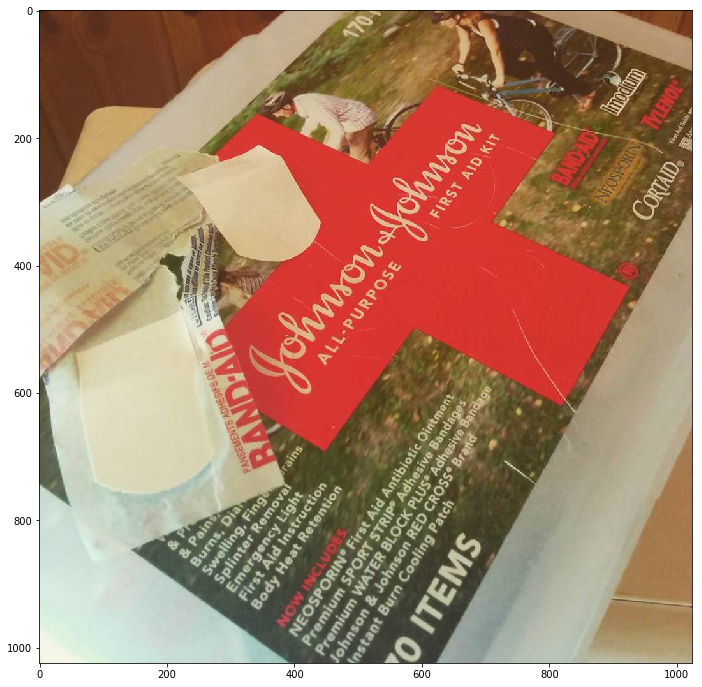

2004
question: what is the brand name of the first aid kit?
ocr_tokens: ['wla', 'the', 'first', 'baidad', 'audet', 'corme', 'ovonve', 'antibiotic', 'cross®', 'retention', 'strip®', 'block', 'red', 'patch', 'sport', 'water', 'johnson', 'hens', 'cooling', 'burn', 'instant']
GT answers: [['johnson & johnson', 1.0], ['johnson and johnson', 0.9], ['johnson', 0.3], ['johnson johnson', 0.3]]
Pred ans: unanswerable (False)


In [7]:
i = np.random.randint(len(data))
pair = data[i]
rpair = rawdata[i]
res = results[i]
assert(pair['question_id'] == rpair['question_id'] == res['question_id'])
img = imread('{}/{}.jpg'.format(img_folder, pair['image_id']))
fig,ax = plt.subplots(figsize=(12, 12))
ax.imshow(img)
plt.show()
print(i)
print('question: {}'.format(pair['question']))
print('ocr_tokens: {}'.format(list(map(low, pair['ocr_tokens']))))
if split_name != 'test':
    print('GT answers: {}'.format(rpair['answers']))
    print('Pred ans: {} ({})'.format(res['answer'], res['answer'] in [gtans[0] for gtans in rpair['answers']]))
else:
    print('Pred ans: {}'.format(res['answer']))

In [8]:
# show larger image link
print('large img: {}'.format(pair['flickr_300k_url']))
print('larger img: {}'.format(pair['flickr_original_url']))

large img: https://c7.staticflickr.com/1/494/19318709936_c132bcbb34_z.jpg
larger img: https://farm6.staticflickr.com/494/19318709936_1c60143617_o.jpg
